In [3]:
# look for the most common dimensions for ligands

In [1]:
from pathlib import Path
import re
from collections import Counter
from htmd.ui import *
from tqdm import tqdm

ffevaluate module is in beta version

Please cite HTMD: Doerr et al.(2016)JCTC,12,1845. 
https://dx.doi.org/10.1021/acs.jctc.6b00049
Documentation: http://software.acellera.com/
To update: conda update htmd -c acellera -c psi4

You are on the latest HTMD version (1.13.9).



In [29]:
data_root = Path("../data/training_data")
pdbs = list(data_root.glob("*lig_cg.pdb"))

In [30]:
def get_bounding_box(path): 
    mol = Molecule(str(path), keepaltloc='all')
    bb = htmd.molecule.util.boundingBox(mol)
    return bb[1] - bb[0]

In [31]:
len(pdbs)

3000

In [32]:
bounding_boxes = []
for pdb in tqdm(pdbs):
    bounding_boxes.append(get_bounding_box(pdb))

  0%|          | 0/3000 [00:00<?, ?it/s]/home/alex/miniconda3/lib/python3.6/site-packages/htmd/molecule/readers.py:200: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(mol._dtypes[field], np.float) \
100%|██████████| 3000/3000 [01:54<00:00, 26.16it/s]


In [33]:
dimensions = [l for bb in bounding_boxes for l in bb]

In [39]:
import seaborn as sns

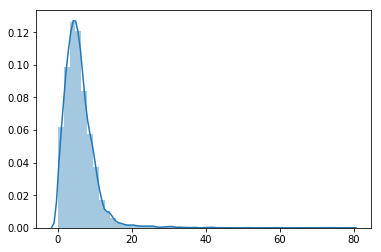

In [40]:
sns.distplot(dimensions)

In [41]:
dims_less_than_24 = list(filter(lambda x: x <= 24, dimensions))

In [42]:
print('Num dimensions less than or eq 24')
len(dims_less_than_24)/len(dimensions)

Num dimensions less than or eq 24


0.9917777777777778

In [44]:
print('Num ligands with at least 1 dim <= 24')
mols_less_than_24 = list(filter(lambda bb: bb[0] <= 24 and bb[1] <=24 and bb[2] <= 24, bounding_boxes))
len(mols_less_than_24)/len(bounding_boxes)

Num ligands with at least 1 dim <= 24


0.9816666666666667